In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
#first dataframe
df_canada_temporary_worker = pd.read_csv("../Dataset/IRCC_FF_TR_2017_05_CSV.csv", encoding="ISO-8859-1")
#second dataframe
df_canada_temp_pr = pd.read_csv("../Dataset/IRCC_FF_PR_2017_15_CSV_pr_contry.csv", encoding="ISO-8859-1")
df_canada_temporary_worker.head()


,Unnamed: 0,Unnamed: 1,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Philippines,Philippines,46972,51292,44840,41762,40744,43689,39925,23642,14718,11901
1,India,Inde,8332,8341,7519,5974,6698,8033,6251,3335,3288,5749
2,Guatemala,Guatemala,1113,1239,1471,1520,1998,2488,2725,3140,4278,5603
3,Mexico,Mexique,4792,4449,2787,4080,3003,4245,3879,2493,7961,2574
4,"Korea, Republic of","Corée, République de",3469,3694,2720,2204,2485,3334,2561,1412,1415,2158


In [3]:
df_canada_temp_pr.head()

,Year/année,Source Country,Pays d'origine,Number/Nombre
0,2008,India,Inde,28255
1,2008,Philippines,Philippines,24883
2,2008,"China, People's Republic of","Chine, République populaire de",30030
3,2008,Syria,Syrie,919
4,2008,United States of America,États-Unis d'Amérique,10186


In [4]:
#clean first dataframe
del df_canada_temporary_worker["Unnamed: 1"]

df_canada_temporary_worker = df_canada_temporary_worker.rename(columns={'Unnamed: 0': "Country"})

In [5]:
#clean second dataframe
del df_canada_temp_pr["Pays d'origine"]
df_canada_temp_pr = df_canada_temp_pr.rename(columns={"Year/année": "Year", "Source Country":"Country", "Number/Nombre":"Number"})

(2007, 2018)

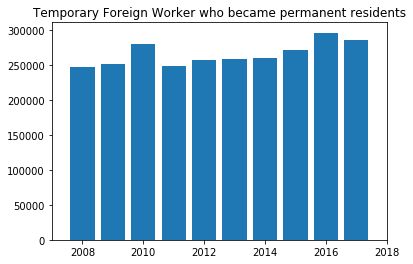

In [6]:
data_total = df_canada_temp_pr.groupby("Year")
df_canada_temp_pr.head()
df_canada_immi = pd.DataFrame({
                 "Number": data_total["Number"].sum()})

df_canada_immi = df_canada_immi.reset_index()
plt.bar(df_canada_immi["Year"], df_canada_immi["Number"])
plt.title("Temporary Foreign Worker who became permanent residents")
plt.xlim(2007, 2018)


In [7]:
df_canada_temporary_worker
df_canada_temporary_worker["Mean"] = 0
df_canada_temporary_worker["Mean"] = (df_canada_temporary_worker["2008"]+df_canada_temporary_worker["2009"]\
                                     +df_canada_temporary_worker["2010"] + df_canada_temporary_worker["2011"] + df_canada_temporary_worker["2012"] \
                                     + df_canada_temporary_worker["2013"] + df_canada_temporary_worker["2014"] + df_canada_temporary_worker["2015"] \
                                     + df_canada_temporary_worker["2016"] + df_canada_temporary_worker["2017"])/10



In [8]:
df_canada_temporary_worker.sort_values("Mean", ascending = False)


,Country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Mean
0,Philippines,46972,51292,44840,41762,40744,43689,39925,23642,14718,11901,35948.5
1,India,8332,8341,7519,5974,6698,8033,6251,3335,3288,5749,6352.0
5,United States of America,6241,6182,5019,4937,5755,5875,4481,3216,1918,1584,4520.8
3,Mexico,4792,4449,2787,4080,3003,4245,3879,2493,7961,2574,4026.3
7,United Kingdom and Overseas Territories,5796,5656,4198,3792,4070,4969,3889,2465,1597,1228,3766.0
6,France,2824,3098,3152,2981,3086,3312,3249,2502,1938,1424,2756.6
2,Guatemala,1113,1239,1471,1520,1998,2488,2725,3140,4278,5603,2557.5
4,"Korea, Republic of",3469,3694,2720,2204,2485,3334,2561,1412,1415,2158,2545.2
9,"China, People's Republic of",2724,2235,1716,1637,1668,1755,1397,907,938,1037,1601.4
10,Jamaica,1116,1117,1123,1239,1412,2255,2464,1474,1331,846,1437.7


In [9]:
df_canada_temp_pr.head()
group_df_canada_temp_pr = df_canada_temp_pr.pivot(index="Country", columns="Year", values="Number")


group_df_canada_temp_pr.reset_index(inplace=True)
group_df_canada_temp_pr["Mean"] = (group_df_canada_temp_pr[2008]+group_df_canada_temp_pr[2009]+group_df_canada_temp_pr[2010]\
                                +group_df_canada_temp_pr[2011]+group_df_canada_temp_pr[2012]+group_df_canada_temp_pr[2013]\
                                +group_df_canada_temp_pr[2014]+group_df_canada_temp_pr[2015]+group_df_canada_temp_pr[2016]\
                                +group_df_canada_temp_pr[2017])/10

group_df_canada_temp_pr.sort_values("Mean", ascending = False).head(3)


Year,Country,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,Mean
147,Philippines,24883,28568,38615,36758,34299,29530,40033,50838,41812,40851,36618.7
78,India,28255,29448,34225,27486,30914,33078,38335,39526,39792,51653,35271.2
34,"China, People's Republic of",30030,29617,30379,28491,33009,34114,24628,19534,26854,30281,28693.7


In [10]:
filter_df_top3 = df_canada_temp_pr.loc[(df_canada_temp_pr['Country']=="Philippines") | (df_canada_temp_pr['Country']=="India")|
                                            (df_canada_temp_pr['Country']=="China, People's Republic of")]

filter_df_top3_philippines = filter_df_top3[filter_df_top3['Country']=="Philippines"]
filter_df_top3_india = filter_df_top3[filter_df_top3['Country']=="India"]
filter_df_top3_china = filter_df_top3[filter_df_top3['Country']=="China, People's Republic of"]

#filter_df_top3_philippines


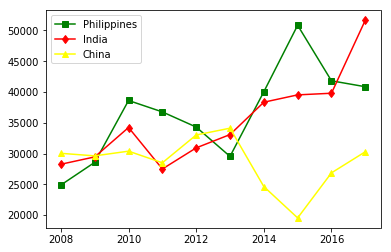

In [11]:
# plt.bar(filter_df_top3_philippines["Year"],filter_df_top3_philippines["Number"], color = "green")
# plt.bar(filter_df_top3_india["Year"],filter_df_top3_india["Number"], color = "red")
# plt.bar(filter_df_top3_china["Year"],filter_df_top3_china["Number"], color = "yellow")
plt.plot(filter_df_top3_philippines["Year"],filter_df_top3_philippines["Number"], color = "green",marker="s", label = "Philippines")
plt.plot(filter_df_top3_india["Year"],filter_df_top3_india["Number"], color = "red", marker="d",label = "India")
plt.plot(filter_df_top3_china["Year"],filter_df_top3_china["Number"], color = "yellow",marker="^",label = "China")
plt.legend(loc="best")
plt.show()

In [12]:
group_df = df_canada_temp_pr.groupby(["Country"])
group_mean_df = pd.DataFrame({"Mean": group_df["Number"].mean()
    
}) 
group_mean_df
group_mean_df.sort_values("Mean", ascending = False).head(3)

,Mean
Country,
Philippines,36618.7
India,35271.2
"China, People's Republic of",28693.7


In [173]:
#third dataframe
df_canada_destination = pd.read_csv("../Dataset/IRCC_FF_TR_2017_08_CSV_destination.csv", encoding="ISO-8859-1")
df_canada_destination = df_canada_destination.rename(columns={"Unnamed: 0": "Province"})
df_canada_destination= df_canada_destination.drop(df_canada_destination.index[[10,11,12,13]])
df_canada_destination



,Province,Unnamed: 1,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Newfoundland and Labrador,Terre-Neuve-et-Labrador,501,629,405,467,826,1269,991,546,540,349
1,Prince Edward Island,Île-du-Prince-Édouard,270,338,379,389,476,390,378,396,491,344
2,Nova Scotia,Nouvelle-Écosse,1076,1351,1301,1462,1412,1220,959,694,706,617
3,New Brunswick,Nouveau-Brunswick,850,891,805,972,1248,1304,1261,952,863,827
4,Quebec,Québec,7195,8051,8045,8135,8524,8941,8967,7377,7629,7181
5,Ontario,Ontario,35078,31191,28868,22876,23279,23251,19672,14368,15778,13519
6,Manitoba,Manitoba,2242,1954,1107,741,1065,1431,1234,855,757,679
7,Saskatchewan,Saskatchewan,1787,2443,1873,1432,2198,3780,3485,1726,1025,640
8,Alberta,Alberta,35512,38283,30072,28075,29697,40786,35556,18028,10752,8713
9,British Columbia,Colombie-Britannique,26352,28317,20584,15878,18570,22381,21555,14915,11706,13115


In [174]:
#df_canada_destination.transpose()[2:].reset_index().apply(pd.to_numeric, errors="ignore").plot(x = "index")
calc_df_canada =df_canada_destination.transpose()[2:].reset_index().apply(pd.to_numeric, errors="ignore")
# del calc_df_canada[10]
# del calc_df_canada[11]
# del calc_df_canada[12]
# del calc_df_canada[13]

In [175]:
calc_df_canada

,index,0,1,2,3,4,5,6,7,8,9
0,2008,501,270,1076,850,7195,35078,2242,1787,35512,26352
1,2009,629,338,1351,891,8051,31191,1954,2443,38283,28317
2,2010,405,379,1301,805,8045,28868,1107,1873,30072,20584
3,2011,467,389,1462,972,8135,22876,741,1432,28075,15878
4,2012,826,476,1412,1248,8524,23279,1065,2198,29697,18570
5,2013,1269,390,1220,1304,8941,23251,1431,3780,40786,22381
6,2014,991,378,959,1261,8967,19672,1234,3485,35556,21555
7,2015,546,396,694,952,7377,14368,855,1726,18028,14915
8,2016,540,491,706,863,7629,15778,757,1025,10752,11706
9,2017,349,344,617,827,7181,13519,679,640,8713,13115


In [203]:
for x in range(0,10):
    sumNew = calc_df_canada[x].sum()
    calc_df_canada[x] = (calc_df_canada[x]/sumNew)*100
   


In [206]:
calc_df_canada["Mean"] = calc_df_canada.sum()
calc_df_canada

,index,0,1,2,3,4,5,6,7,8,9,Mean
0,2008,7.680515,7.011166,9.964808,8.523012,8.988694,15.393189,18.582677,8.764530,12.891235,13.627549,100.0
1,2009,9.642802,8.776941,12.511576,8.934122,10.058092,13.687467,16.195607,11.981951,13.897137,14.643720,100.0
2,2010,6.208800,9.841600,12.048528,8.071794,10.050597,12.668071,9.175300,9.186326,10.916457,10.644713,100.0
3,2011,7.159283,10.101272,13.539544,9.746315,10.163033,10.038617,6.141732,7.023395,10.191524,8.211074,100.0
4,2012,12.662885,12.360426,13.076496,12.513787,10.649010,10.215464,8.827186,10.780323,10.780328,9.603202,100.0
5,2013,19.454239,10.127240,11.298389,13.075303,11.169967,10.203177,11.860754,18.539409,14.805753,11.574005,100.0
6,2014,15.192396,9.815632,8.881274,12.644139,11.202449,8.632614,10.227932,17.092550,12.907207,11.146851,100.0
7,2015,8.370382,10.283043,6.427116,9.545774,9.216066,6.305073,7.086614,8.465349,6.544356,7.713073,100.0
8,2016,8.278400,12.749935,6.538248,8.653364,9.530889,6.923820,6.274347,5.027221,3.903091,6.053586,100.0
9,2017,5.350299,8.932745,5.714021,8.292389,8.971204,5.932508,5.627849,3.138947,3.162912,6.782229,100.0


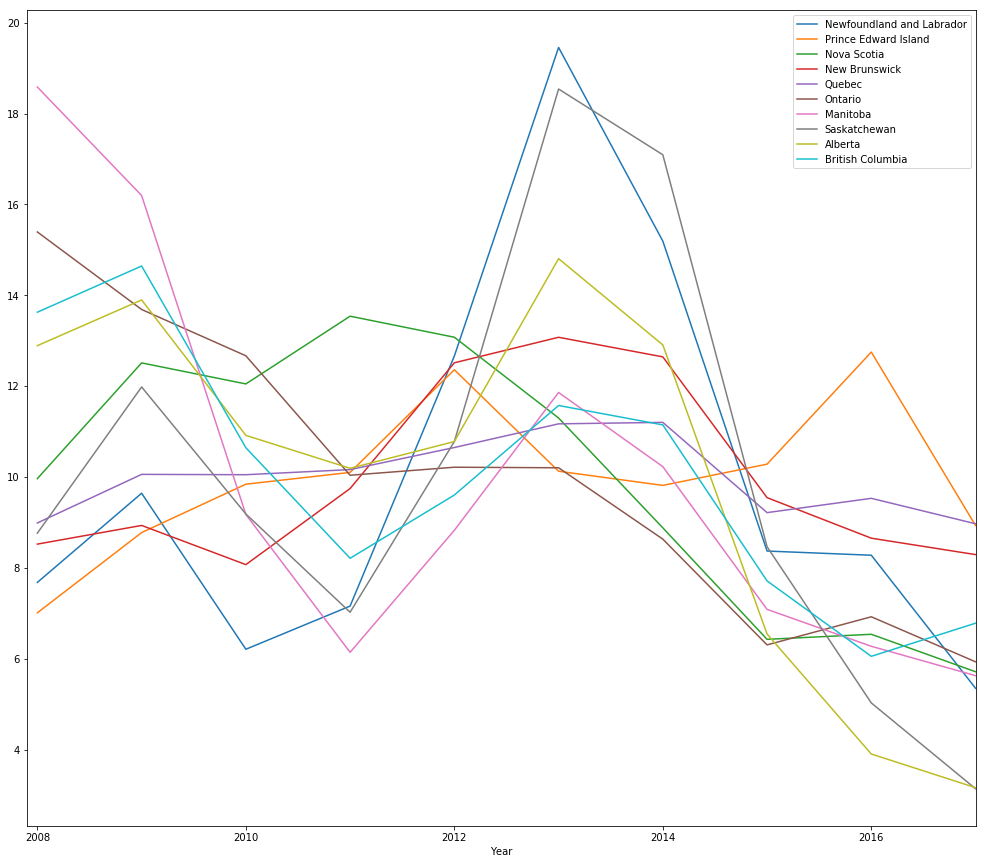

In [180]:
calc_df_canada.plot(x = "index",figsize=(17,15))

plt.xlabel("Year")
red_patch = ["a"]
plt.legend(df_canada_destination["Province"],loc="best")
plt.xlim(2007.9,2017)
plt.show()


In [191]:
import requests
import json

# Google API Key
from config import gkey
from pprint import pprint

In [201]:
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
location=[]
for city in df_canada_destination["Province"]:
    param = {"address": city, "key": gkey}
    response = requests.get(base_url, params=param).json()
#     pprint(response)
# Extract lat/lng
    lat = response["results"][0]["geometry"]["location"]["lat"]
    lng = response["results"][0]["geometry"]["location"]["lng"]
    print(f"{city}: {lat}, {lng}")
    location.append([lat, lng])

Newfoundland and Labrador: 53.1355091, -57.6604364
Prince Edward Island: 46.510712, -63.41681359999999
Nova Scotia: 44.68198659999999, -63.744311
New Brunswick: 46.5653163, -66.46191639999999
Quebec: 52.9399159, -73.5491361
Ontario: 51.253775, -85.323214
Manitoba: 53.7608608, -98.8138762
Saskatchewan: 52.9399159, -106.4508639
Alberta: 53.9332706, -116.5765035
British Columbia: 53.7266683, -127.6476205


[[53.1355091, -57.6604364],
 [46.510712, -63.41681359999999],
 [44.68198659999999, -63.744311],
 [46.5653163, -66.46191639999999],
 [52.9399159, -73.5491361],
 [51.253775, -85.323214],
 [53.7608608, -98.8138762],
 [52.9399159, -106.4508639],
 [53.9332706, -116.5765035],
 [53.7266683, -127.6476205]]

In [ ]:
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations, weights=poverty_rate, 
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)

# Adjust heat_layer setting to help with heatmap dissipating on zoom
heat_layer.dissipating = False
heat_layer.max_intensity = 100
heat_layer.point_radius = 1

fig.add_layer(heat_layer)

fig